# Lib import

In [ ]:
import pandas as pd
import numpy as np
import scipy.stats as sps
import seaborn as sns

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d  
from matplotlib import cm

# Скачивание предобработанного датасета

Загружаем датасет с GitHub:

In [ ]:
import zipfile
import os

!wget --no-check-certificate \
    "https://github.com/PolMix/nems_ai/archive/refs/heads/main.zip" \
    -O "/tmp/data.zip"


zip_ref = zipfile.ZipFile('/tmp/data.zip', 'r') #Opens the zip file in read mode
zip_ref.extractall('/tmp') #Extracts the files into the /tmp folder
zip_ref.close()

--2023-04-02 08:26:14--  https://github.com/PolMix/nems_ai/archive/refs/heads/main.zip
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/PolMix/nems_ai/zip/refs/heads/main [following]
--2023-04-02 08:26:14--  https://codeload.github.com/PolMix/nems_ai/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.114.9
Connecting to codeload.github.com (codeload.github.com)|140.82.114.9|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘/tmp/data.zip’

/tmp/data.zip           [     <=>            ]  10.37M  5.60MB/s    in 1.9s    

2023-04-02 08:26:16 (5.60 MB/s) - ‘/tmp/data.zip’ saved [10873023]



In [ ]:
%cd '/tmp/nems_ai-main/Data Processed'
filename = 'Data_Processed_10000nm.csv'
df = pd.read_csv(filename)
df = df.drop(columns='Unnamed: 0')
df.head()

/tmp/nems_ai-main/Data Processed


,Beam length (um),Beam width (nm),Thickness_1 (nm),Thickness_2 (nm),Temperature (K),Distance (nm),Gate voltage (V),M1 Eigenfrequency (Hz),M1 Quality factor,M1 Effective mass (kg),...,M3 Eigenfrequency (Hz),M3 Quality factor,M3 Effective mass (kg),M3 Noise (kg^2/s^3),M3 TED (W),M4 Eigenfrequency (Hz),M4 Quality factor,M4 Effective mass (kg),M4 Noise (kg^2/s^3),M4 TED (W)
0,821.402113,897.519396,200.0,36.102266,2.248089,924.978487,39.775523,169003.789805,53781.219971,2.581146e-13,...,5.089901e+05,53640.722509,2.582148e-13,4.490996e-28,1.441984e-11,6.809541e+05,53577.353352,2.583005e-13,6.009473e-28,2.286573e-11
1,187.634453,482.065578,150.0,19.450374,161.773060,911.580688,10.599196,512665.917301,27829.840781,2.167964e-14,...,1.616819e+06,25729.966624,2.199621e-14,3.120787e-25,1.475224e-11,2.243525e+06,24670.596346,2.212375e-14,4.356675e-25,1.758884e-11
2,638.204045,242.947138,100.0,24.144951,3.181935,455.886263,15.074379,221111.869936,14575.916394,2.871363e-14,...,6.636297e+05,14574.507206,2.871555e-14,5.640215e-28,7.054148e-13,8.851790e+05,14573.764249,2.871377e-14,7.522689e-28,1.155275e-12
3,910.105786,675.544397,200.0,43.676386,107.099808,914.705274,8.740595,124047.991251,39709.542285,2.224241e-13,...,3.731338e+05,38154.086830,2.224716e-13,1.462375e-26,7.550186e-12,4.986630e+05,37426.945624,2.225221e-13,1.954104e-26,1.220765e-11
4,665.998773,627.258997,200.0,26.364768,0.970622,659.057305,0.787551,201641.652944,37627.851275,1.412254e-13,...,6.068425e+05,37612.298667,1.412640e-13,2.752680e-28,4.751424e-12,8.113547e+05,37608.207889,1.412993e-13,3.680917e-28,1.052563e-11


"Читаем" датасет:

In [ ]:
df.head()

,Beam length (um),Beam width (nm),Thickness_1 (nm),Thickness_2 (nm),Temperature (K),Distance (nm),Gate voltage (V),M1 Eigenfrequency (Hz),M1 Quality factor,M1 Effective mass (kg),...,M3 Eigenfrequency (Hz),M3 Quality factor,M3 Effective mass (kg),M3 Noise (kg^2/s^3),M3 TED (W),M4 Eigenfrequency (Hz),M4 Quality factor,M4 Effective mass (kg),M4 Noise (kg^2/s^3),M4 TED (W)
0,821.402113,897.519396,200.0,36.102266,2.248089,924.978487,39.775523,169003.789805,53781.219971,2.581146e-13,...,5.089901e+05,53640.722509,2.582148e-13,4.490996e-28,1.441984e-11,6.809541e+05,53577.353352,2.583005e-13,6.009473e-28,2.286573e-11
1,187.634453,482.065578,150.0,19.450374,161.773060,911.580688,10.599196,512665.917301,27829.840781,2.167964e-14,...,1.616819e+06,25729.966624,2.199621e-14,3.120787e-25,1.475224e-11,2.243525e+06,24670.596346,2.212375e-14,4.356675e-25,1.758884e-11
2,638.204045,242.947138,100.0,24.144951,3.181935,455.886263,15.074379,221111.869936,14575.916394,2.871363e-14,...,6.636297e+05,14574.507206,2.871555e-14,5.640215e-28,7.054148e-13,8.851790e+05,14573.764249,2.871377e-14,7.522689e-28,1.155275e-12
3,910.105786,675.544397,200.0,43.676386,107.099808,914.705274,8.740595,124047.991251,39709.542285,2.224241e-13,...,3.731338e+05,38154.086830,2.224716e-13,1.462375e-26,7.550186e-12,4.986630e+05,37426.945624,2.225221e-13,1.954104e-26,1.220765e-11
4,665.998773,627.258997,200.0,26.364768,0.970622,659.057305,0.787551,201641.652944,37627.851275,1.412254e-13,...,6.068425e+05,37612.298667,1.412640e-13,2.752680e-28,4.751424e-12,8.113547e+05,37608.207889,1.412993e-13,3.680917e-28,1.052563e-11


Исправление неопознанного бага с символом `s` в столбце `M1 TED (W)`:

In [ ]:
import string

for row_index in range(0, df.shape[0]):
    for char in list(string.ascii_lowercase):
        if type(df.iloc[row_index]) == str:
            if char in df.iloc[row_index, 17]:
                df.iloc[row_index, 17] = df.iloc[row_index, 17][1:]
                print('Gotcha, damn bug!')
            else:
                print("What the hell?")

# Распределение входных параметров во всем датасете

Сократим датасет до нужных нам параметров:

In [ ]:
def reduce_df(df, param_general, param_save, mode_number):
    # general parameters - параметры, одинаковые для всех мод колебаний
    # parameters_to_use - параметры, которые мы хотим оставить
    # mode_number - число мод в датасете
    columns_to_get = []
    for mode_index in range(1, mode_number + 1):
        for parameter in param_save:
            columns_to_get.append(f'M{mode_index} ' + parameter)
    param_general += columns_to_get
    return df[param_general]

In [ ]:
param_general = ['Beam length (um)', 'Beam width (nm)', 'Thickness_1 (nm)', 'Thickness_2 (nm)', 'Temperature (K)', 'Distance (nm)', 'Gate voltage (V)']
param_save = ['Eigenfrequency (Hz)', 'Quality factor', 'Effective mass (kg)', 'TED (W)', 'Noise (kg^2/s^3)']
#df = reduce_df(df, param_general=param_general, param_save=param_save, mode_number=4)
df.head()

,Beam length (um),Beam width (nm),Thickness_1 (nm),Thickness_2 (nm),Temperature (K),Distance (nm),Gate voltage (V),M1 Eigenfrequency (Hz),M1 Quality factor,M1 Effective mass (kg),...,M3 Eigenfrequency (Hz),M3 Quality factor,M3 Effective mass (kg),M3 Noise (kg^2/s^3),M3 TED (W),M4 Eigenfrequency (Hz),M4 Quality factor,M4 Effective mass (kg),M4 Noise (kg^2/s^3),M4 TED (W)
0,821.402113,897.519396,200.0,36.102266,2.248089,924.978487,39.775523,169003.789805,53781.219971,2.581146e-13,...,5.089901e+05,53640.722509,2.582148e-13,4.490996e-28,1.441984e-11,6.809541e+05,53577.353352,2.583005e-13,6.009473e-28,2.286573e-11
1,187.634453,482.065578,150.0,19.450374,161.773060,911.580688,10.599196,512665.917301,27829.840781,2.167964e-14,...,1.616819e+06,25729.966624,2.199621e-14,3.120787e-25,1.475224e-11,2.243525e+06,24670.596346,2.212375e-14,4.356675e-25,1.758884e-11
2,638.204045,242.947138,100.0,24.144951,3.181935,455.886263,15.074379,221111.869936,14575.916394,2.871363e-14,...,6.636297e+05,14574.507206,2.871555e-14,5.640215e-28,7.054148e-13,8.851790e+05,14573.764249,2.871377e-14,7.522689e-28,1.155275e-12
3,910.105786,675.544397,200.0,43.676386,107.099808,914.705274,8.740595,124047.991251,39709.542285,2.224241e-13,...,3.731338e+05,38154.086830,2.224716e-13,1.462375e-26,7.550186e-12,4.986630e+05,37426.945624,2.225221e-13,1.954104e-26,1.220765e-11
4,665.998773,627.258997,200.0,26.364768,0.970622,659.057305,0.787551,201641.652944,37627.851275,1.412254e-13,...,6.068425e+05,37612.298667,1.412640e-13,2.752680e-28,4.751424e-12,8.113547e+05,37608.207889,1.412993e-13,3.680917e-28,1.052563e-11


Вытаскиваем все названия колонок входных параметров:

In [ ]:
col_names = list(df.columns)
print(col_names)

['Beam length (um)', 'Beam width (nm)', 'Thickness_1 (nm)', 'Thickness_2 (nm)', 'Temperature (K)', 'Distance (nm)', 'Gate voltage (V)', 'M1 Eigenfrequency (Hz)', 'M1 Quality factor', 'M1 Effective mass (kg)', 'M1 Noise (kg^2/s^3)', 'M1 TED (W)', 'M2 Eigenfrequency (Hz)', 'M2 Quality factor', 'M2 Effective mass (kg)', 'M2 Noise (kg^2/s^3)', 'M2 TED (W)', 'M3 Eigenfrequency (Hz)', 'M3 Quality factor', 'M3 Effective mass (kg)', 'M3 Noise (kg^2/s^3)', 'M3 TED (W)', 'M4 Eigenfrequency (Hz)', 'M4 Quality factor', 'M4 Effective mass (kg)', 'M4 Noise (kg^2/s^3)', 'M4 TED (W)']


Функция для визуализации распределений:

In [ ]:
def plot_distribution(df, indices_to_plot: list, col_names, log_scale):
    fig, ax = plt.subplots(nrows=1, ncols=len(indices_to_plot), figsize=(5 * len(indices_to_plot), 5))
    for j in range(0, len(indices_to_plot)):
        sns.histplot(df.iloc[:, indices_to_plot[j]], ax=ax[j], log_scale=log_scale)
        ax[j].set_title(f"{col_names[indices_to_plot[j]]} distribution.", fontsize=2 * (len(indices_to_plot) + 1))
        ax[j].set_xlabel(col_names[indices_to_plot[j]])
        ax[j].set_ylabel('Count')
    plt.show()

Распределение длины, ширины и толщин нанопровода в датасете:

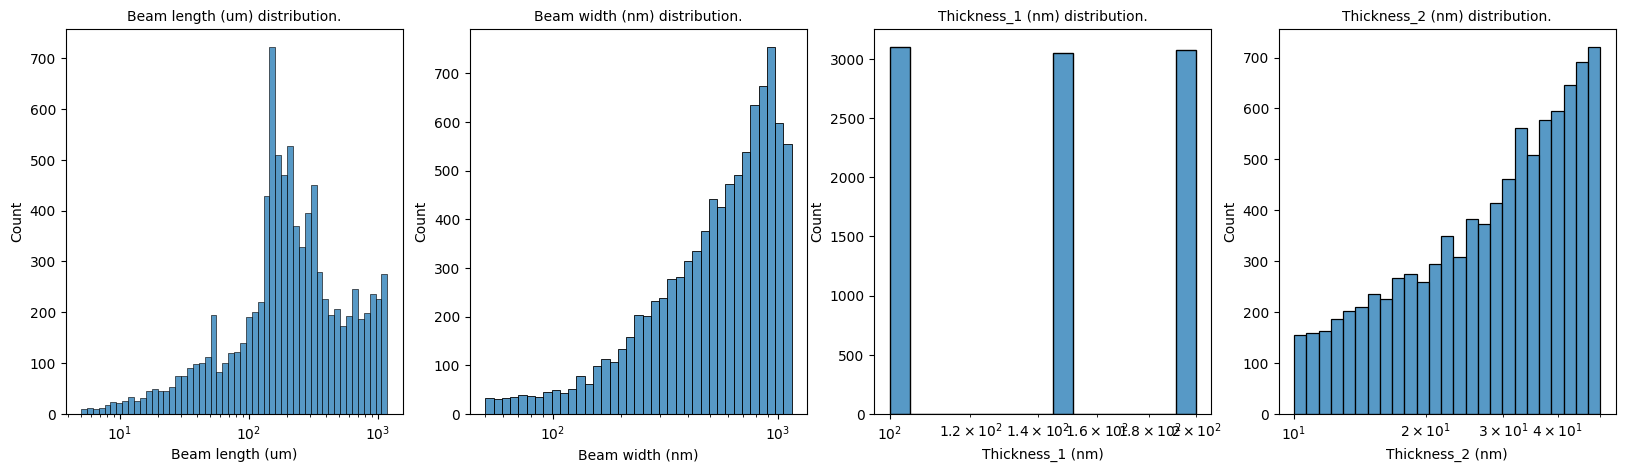

In [ ]:
plot_distribution(df, indices_to_plot=[0, 1, 2, 3], col_names=col_names, log_scale=True)

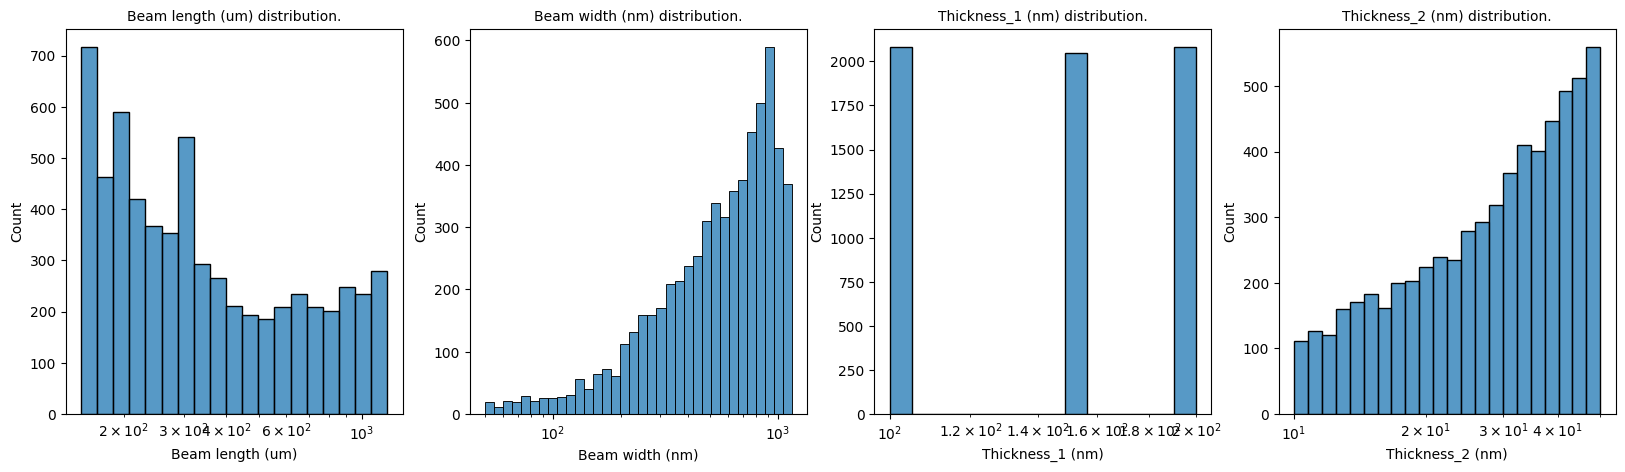

In [ ]:
plot_distribution(df[df['Beam length (um)'] > 150], indices_to_plot=[0, 1, 2, 3], col_names=col_names, log_scale=True)

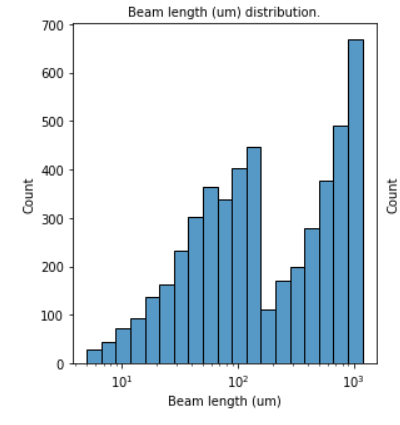

Распределение температуры (низкий и высокий пределы), расстояния от затвора до нанопровода и напряжения на затворе. Два распределения температуры: 
$$ T \in U(0, 6) \; \text{or} \; U(0, 300)$$

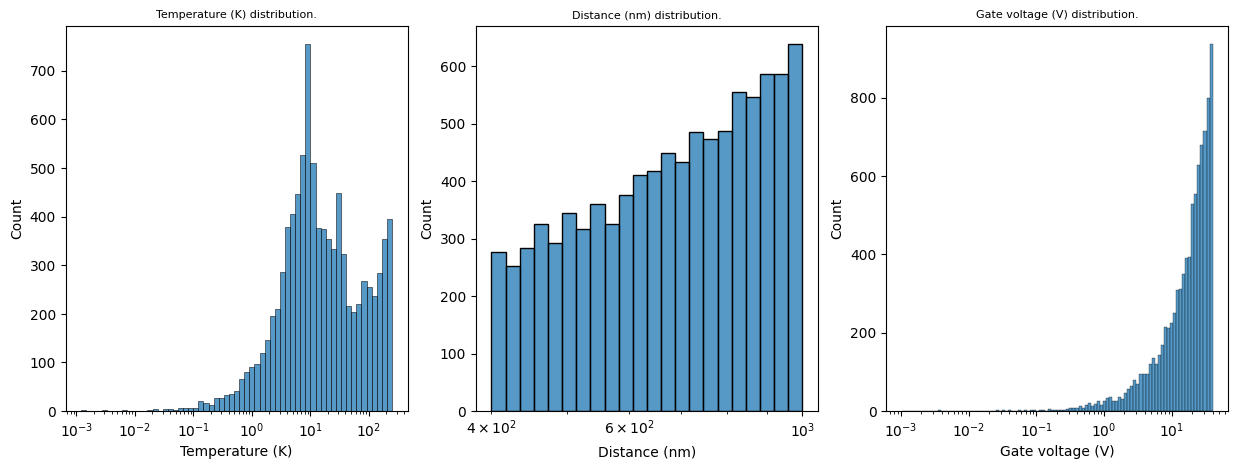

In [ ]:
plot_distribution(df, indices_to_plot=[4, 5, 6], col_names=col_names, log_scale=True)

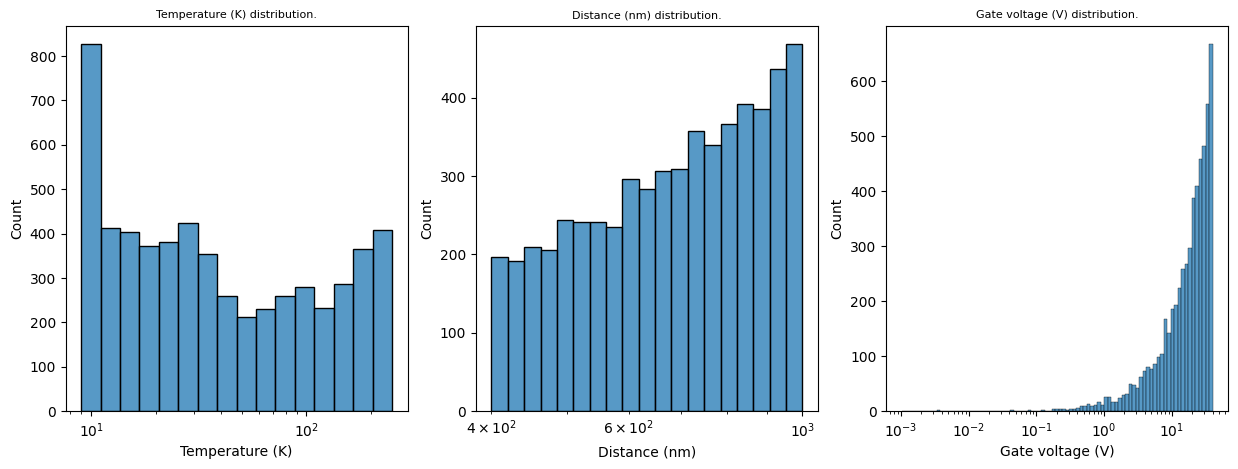

In [ ]:
plot_distribution(df[df['Temperature (K)'] > 9], indices_to_plot=[4, 5, 6], col_names=col_names, log_scale=True)

Функция, которая сортирует весь датасет по температурным диапазонам $0 \; K \le T \le 6 \; K$ и $6 \; K \le T \le  300 \; K$

In [ ]:
def sort_by_temperature(df, threshold=6):
    mask = df['Temperature (K)'] <= threshold
    return df[mask], df[~mask]

Функция визуализации распределения температуры:

In [ ]:
def plot_temperature(df, temp_index, col_names):
    fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))
    df_low, df_high = sort_by_temperature(df=df, threshold=6)
    for j in range(0, 2):
        if j == 0:
            sns.histplot(df_low.iloc[:, temp_index], ax=ax[j])
        else:
            sns.histplot(df_high.iloc[:, temp_index], ax=ax[j])
        ax[j].set_title(f"{col_names[temp_index]} distribution.", fontsize=4)
        ax[j].set_xlabel(col_names[temp_index])
        ax[j].set_ylabel('Count')
    plt.show()

Распределение температуры:

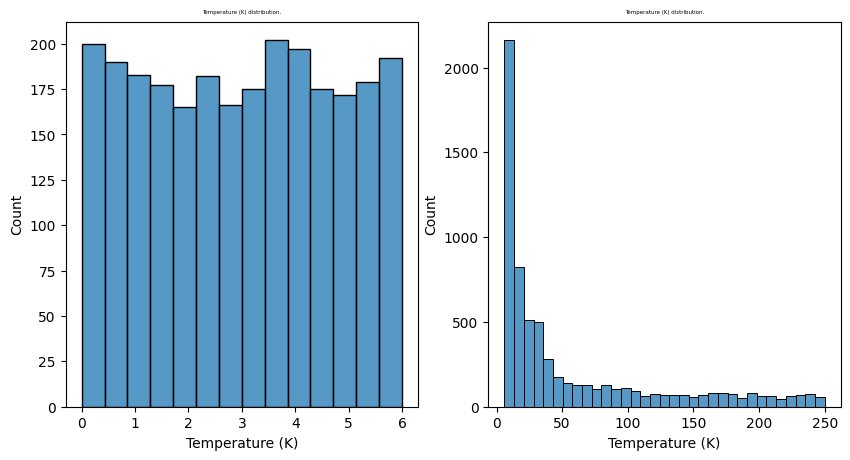

In [ ]:
plot_temperature(df=df, temp_index=4, col_names=col_names)

# Распределение выходных параметров во всем датасете для каждой моды в отдельности

Здесь приведены распределения резонансной частоты, добротности, эффективной массы и термоупругих потерь для всего датасета.

Распределение резонансных частот по модам (**atencio:** логарифмический масштаб):

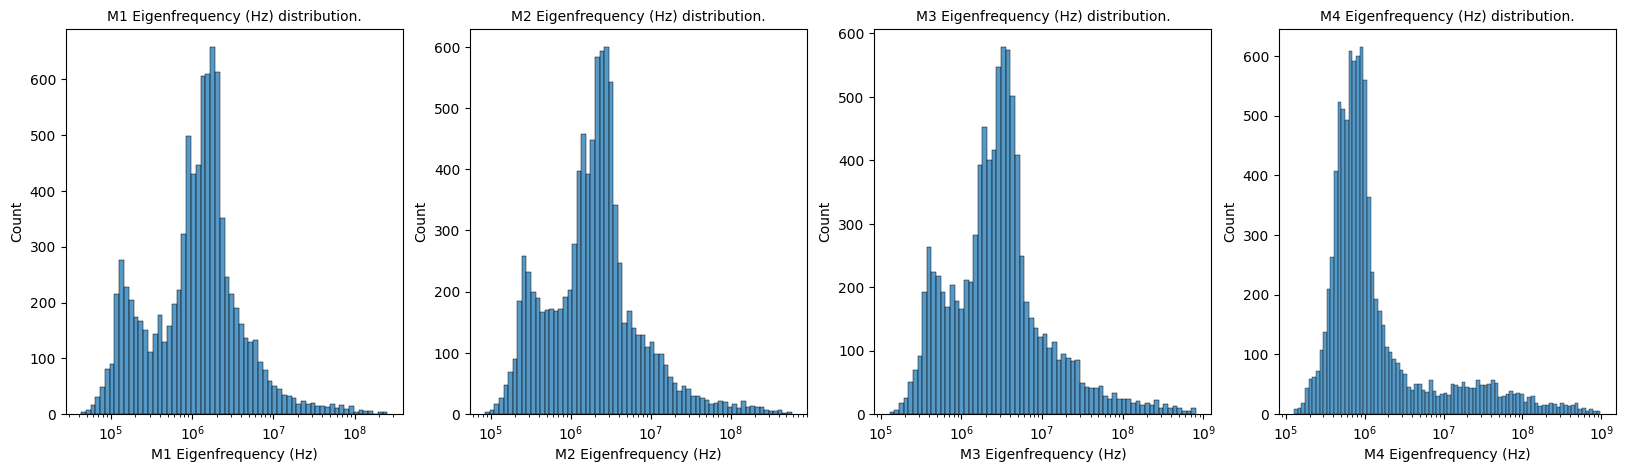

In [ ]:
plot_distribution(df, indices_to_plot=[7, 12, 17, 22], col_names=col_names, log_scale=True)

__Note__: распределение при 2000 обычных конфигурациях + 1200 коротких конфигураций 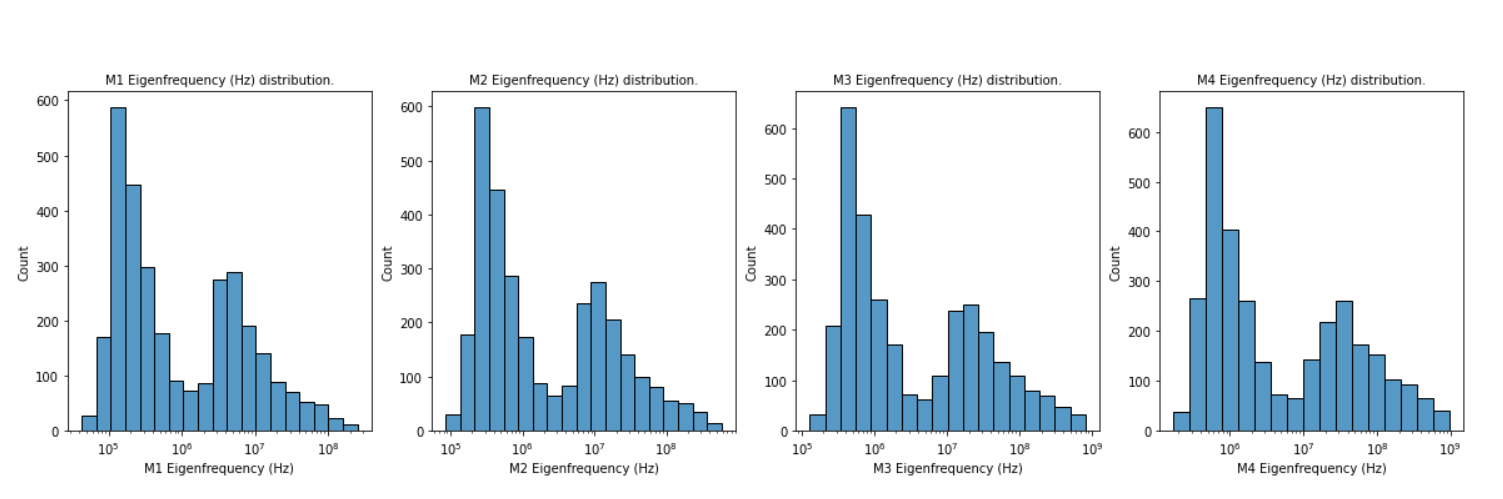

__Note__: 2000 обычных + 1200 коротких + 1200 средних
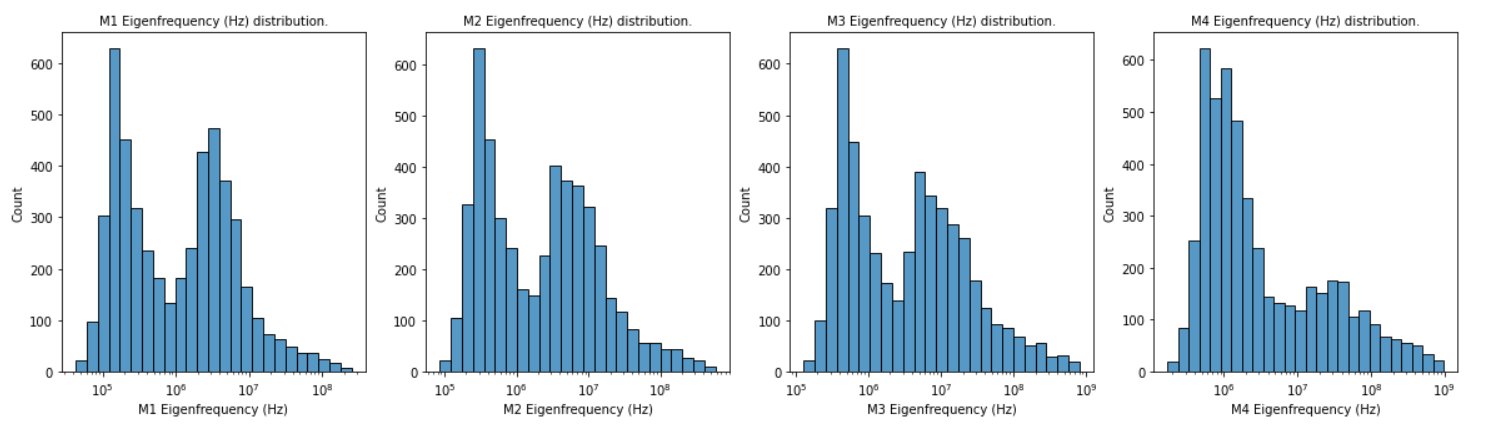

Распределение добротностей по модам. Комментарий: наблюдаем аномалию на 3-ей и 4-ой модах?

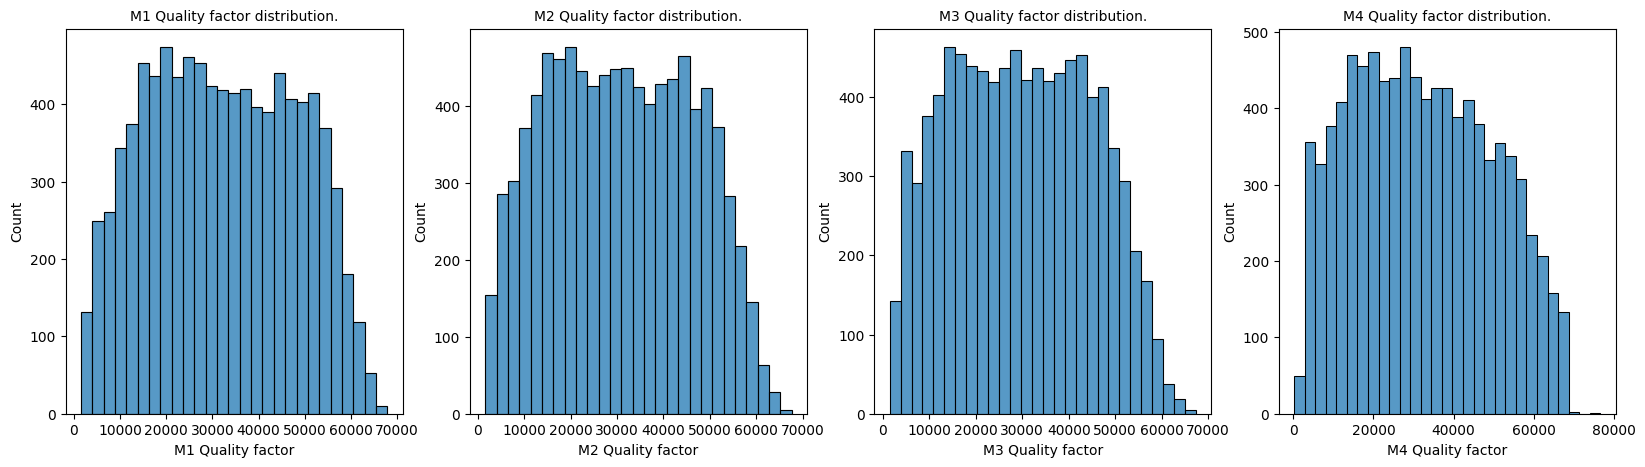

In [ ]:
plot_distribution(df, indices_to_plot=[8, 13, 18, 23], col_names=col_names, log_scale=False)

Распределение эффективной массы по модам:

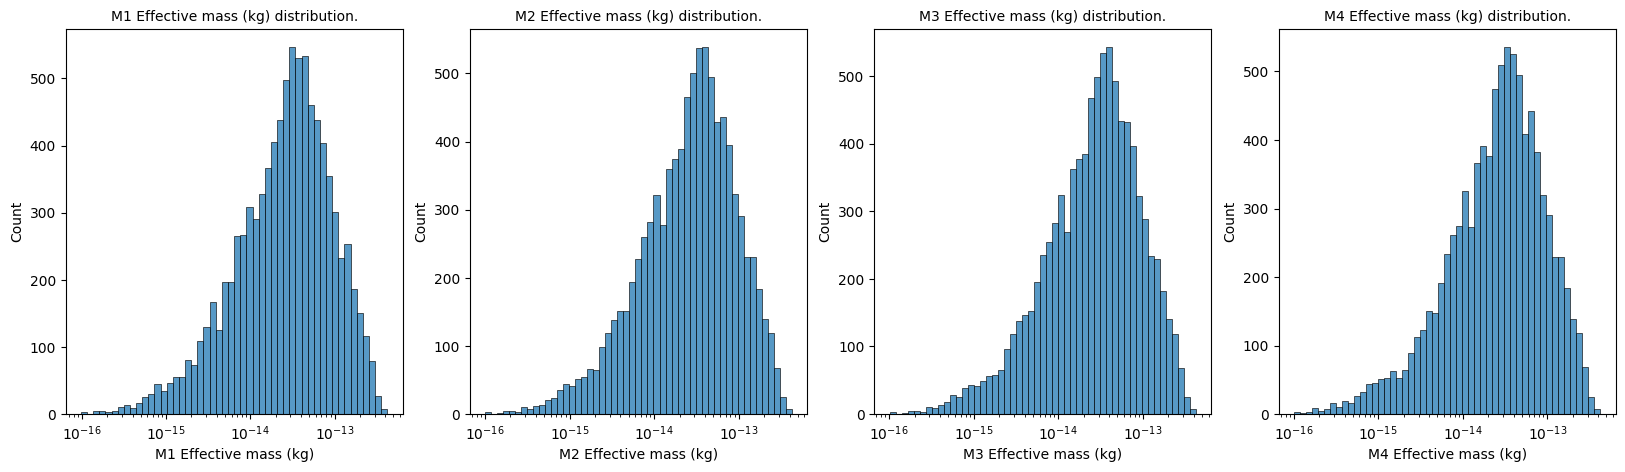

In [ ]:
plot_distribution(df, indices_to_plot=[9, 14, 19, 24], col_names=col_names, log_scale=True)

Распределение термоупругих потерь по модам:

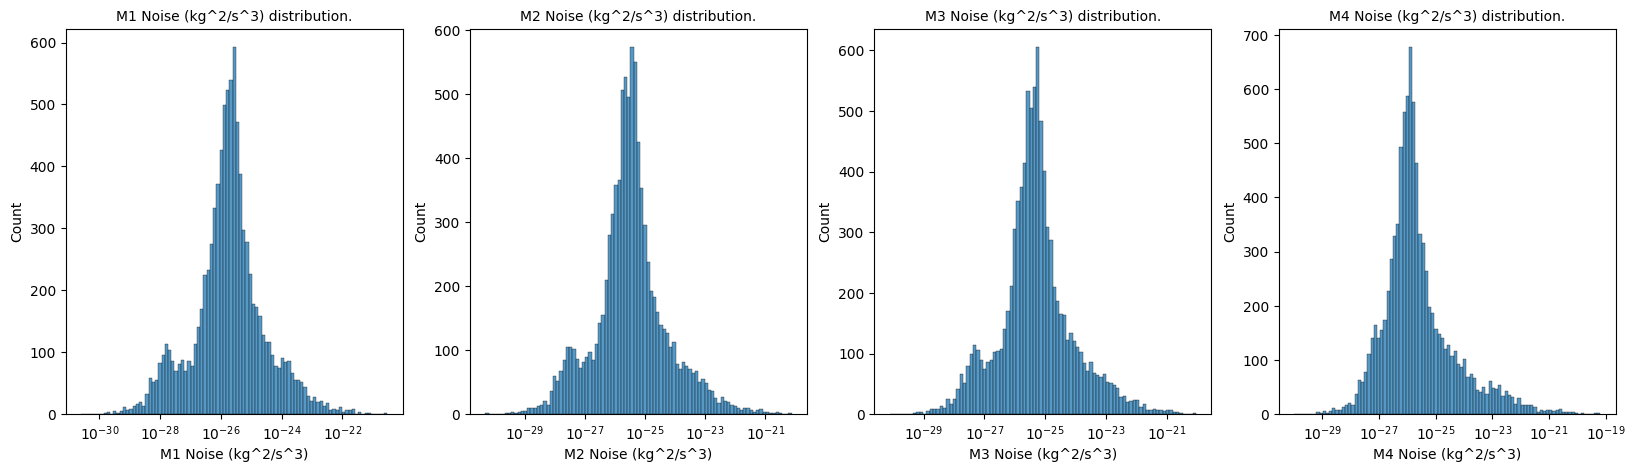

In [ ]:
plot_distribution(df, indices_to_plot=[10, 15, 20, 25], col_names=col_names, log_scale=True)

Распределение шумов по модам:

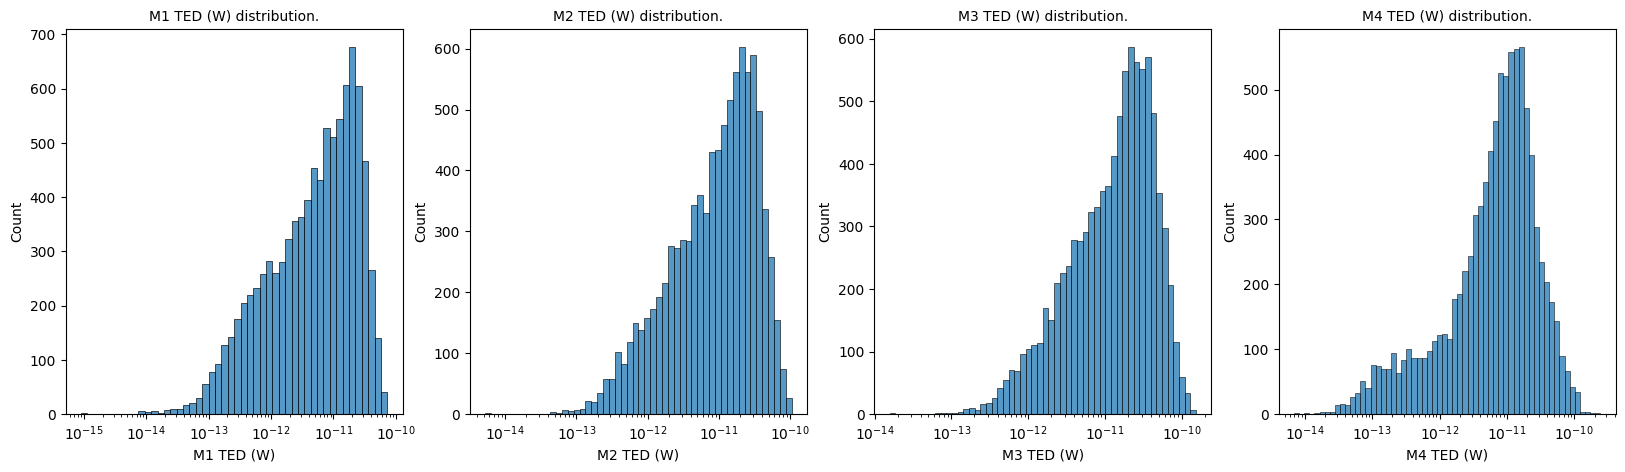

In [ ]:
plot_distribution(df, indices_to_plot=[11, 16, 21, 26], col_names=col_names, log_scale=True)